# Introduction

The given dataset contains the metadata of the books from **bookdepository.com**. The detailed information of the attributes is provided below.

- **authors** : list of authors
- bestseller-rank : Bestseller ranking
- categories : List of all categories (genres)
- description : Description(string)
- dimension-x : Dimension along x axis (float in cms)
- dimension-y : Dimension along y axis (float in cms)
- dimension-z : Dimension along z axis (float in cms)
- edition : Edition (string)
- edition-statement : Edition statement (string)
- for-ages : Ranges of ages 
- format : Format 
- id : Unique Identifier
- illustration-note
- image-checksum : Cover Image checksum
- image-path : Cover image file path
- image-url : Cover image url
- imprint
- index-date : Crawling date 
- isbn10 : ISBN-10
- isbn13 : ISBN-13 
- lang : List of languages of book
- publication-date : Publication date
- publication-place : Publication place
- rating-avg : Rating average (0-5)
- rating-count : Number of ratings 
- title : Book's title 
- url : Relative URL (https://bookdepository.com + url)
- weight : Weight of book in KG

# Preprocessing and EDA

In [3]:
import pandas as pd


In [4]:
data_d = pd.read_csv('/Users/apple/Downloads/archive (5)/dataset.csv')
data_p = pd.read_csv('/Users/apple/Downloads/archive (5)/places.csv')
data_a = pd.read_csv('/Users/apple/Downloads/archive (5)/authors.csv')
data_f = pd.read_csv('/Users/apple/Downloads/archive (5)/formats.csv')
data_c = pd.read_csv('/Users/apple/Downloads/archive (5)/categories.csv')

In [5]:
data_d.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'id', 'illustrations-note',
       'image-checksum', 'image-path', 'image-url', 'imprint', 'index-date',
       'isbn10', 'isbn13', 'lang', 'publication-date', 'publication-place',
       'rating-avg', 'rating-count', 'title', 'url', 'weight'],
      dtype='object')

In [6]:
data_p.columns

Index(['place_id', 'place_name'], dtype='object')

In [7]:
data_a.columns

Index(['author_id', 'author_name'], dtype='object')

In [8]:
data_f.columns

Index(['format_id', 'format_name'], dtype='object')

In [9]:
data_c.columns

Index(['category_id', 'category_name'], dtype='object')

In [10]:
Data_f = pd.DataFrame(data_f,index = [9,22,35] )

print(Data_f)

Data_d = pd.merge(data_d, Data_f, left_on='format', right_on='format_id', how='inner')

    format_id format_name
9           6    Calendar
22          2    Hardback
35          1   Paperback


In [11]:
Data_d['format'].nunique()

3

In [12]:
Data_d.dropna(subset=['dimension-x','dimension-y','dimension-z','weight'], inplace=True)

Data_d.drop(Data_d.columns[[10]], axis=1, inplace=True)

In [13]:
Data_d.isnull().sum()

authors                    0
bestsellers-rank      313781
categories                 0
description            19732
dimension-x                0
dimension-y                0
dimension-z                0
edition               814884
edition-statement     640500
for-ages              828505
id                         0
illustrations-note    560268
image-checksum            27
image-path                27
image-url                 27
imprint               665502
index-date            886729
isbn10                     0
isbn13                     0
lang                    8169
publication-date          55
publication-place     886729
rating-avg            338247
rating-count          338247
title                      0
url                        0
weight                     0
format_id                  0
format_name                0
dtype: int64

In [14]:
Data_d.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
format_id               int64
format_name            object
dtype: object

In [15]:
Data_d.shape

(886729, 29)

Format : Calendar , Hardback , Paperback
<br>
Format classification using 3 dimensions and weight

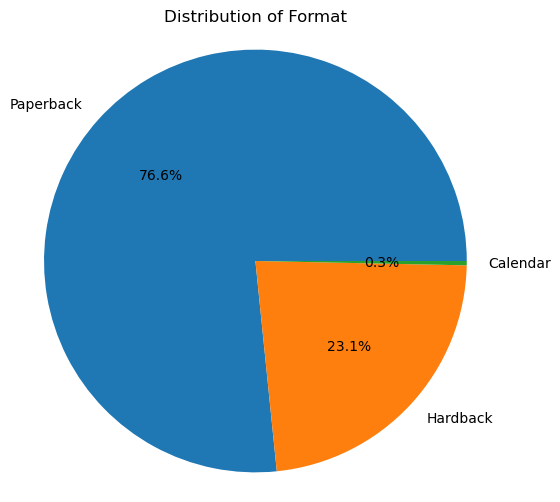

In [16]:
import matplotlib.pyplot as plt

value_counts = Data_d['format_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Format')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

In [17]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [18]:
data_df = Data_d[['dimension-x','dimension-y','dimension-z','weight']]
X_train, X_test, y_train, y_test = train_test_split(data_df, Data_d["format_id"], random_state=42, test_size=0.20)

In [19]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [20]:
# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [21]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [22]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8819370044996786
              precision    recall  f1-score   support

           1       0.91      0.94      0.92    136327
           2       0.77      0.70      0.73     40460
           6       0.89      0.79      0.84       559

    accuracy                           0.88    177346
   macro avg       0.86      0.81      0.83    177346
weighted avg       0.88      0.88      0.88    177346



In [23]:
Data_f = pd.DataFrame(data_f,index = [8,22,35] )

print(Data_f)

Data_d = pd.merge(data_d, Data_f, left_on='format', right_on='format_id', how='inner')

    format_id format_name
8           3          CD
22          2    Hardback
35          1   Paperback


In [24]:
Data_d['format'].nunique()

3

In [25]:
Data_d.dropna(subset=['dimension-x','dimension-y','dimension-z','weight'], inplace=True)

Data_d.drop(Data_d.columns[[10]], axis=1, inplace=True)

In [26]:
Data_d.isnull().sum()

authors                    0
bestsellers-rank      359547
categories                 0
description            23889
dimension-x                0
dimension-y                0
dimension-z                0
edition               823963
edition-statement     649118
for-ages              898725
id                         0
illustrations-note    633796
image-checksum            27
image-path                27
image-url                 27
imprint               725202
index-date            960207
isbn10                     0
isbn13                     0
lang                   10460
publication-date          64
publication-place     960207
rating-avg            348207
rating-count          348207
title                      0
url                        0
weight                     0
format_id                  0
format_name                0
dtype: int64

In [27]:
Data_d.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
format_id               int64
format_name            object
dtype: object

In [28]:
Data_d.shape

(960207, 29)

Format : CD , Hardback , Paperback
<br>
Format classification using 3 dimensions and weight

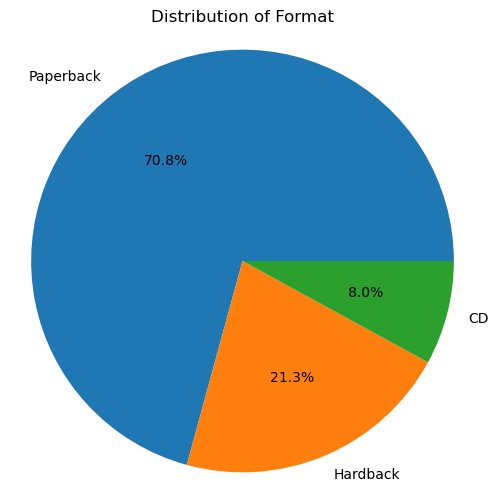

In [29]:
import matplotlib.pyplot as plt

value_counts = Data_d['format_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Format')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

In [30]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
data_df = Data_d[['dimension-x','dimension-y','dimension-z','weight']]
X_train, X_test, y_train, y_test = train_test_split(data_df, Data_d["format_id"], random_state=42, test_size=0.20)

In [32]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [33]:
# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [35]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8863425708959498
              precision    recall  f1-score   support

           1       0.91      0.93      0.92    136113
           2       0.77      0.70      0.73     40708
           3       0.97      0.95      0.96     15221

    accuracy                           0.89    192042
   macro avg       0.88      0.86      0.87    192042
weighted avg       0.88      0.89      0.88    192042

